In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
def random_points(n):
    points = []
    points, _ = make_blobs(n, random_state=2)
    return points

In [3]:
def dist(x1, y1, x2, y2):
  points_1 = np.array((x1, y1))
  points_2 = np.array((x2, y2))
  square = np.square(points_1-points_2)
  sum_square = np.sum(square)
  return np.sqrt(sum_square)
    # return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [4]:
def cluster(k, points, x_c, y_c):
    clust = []
    for i in range(0, len(points)):
        min = dist(points['x'][i],points['y'][i], x_c[0], y_c[0])
        min_numb = 0
        for j in range(1, k):
            if min > dist(points['x'][i],points['y'][i], x_c[j], y_c[j]):
                min = dist(points['x'][i],points['y'][i], x_c[j], y_c[j])
                min_numb = j
        clust.append(min_numb)
    return clust

In [5]:
def algorithm(k, points, x_c, y_c, clust):
    for i in range(k):
        avg_x = 0
        avg_y = 0
        points_cnt = 0
        for j in range(len(points)):
            if clust[j] == i:
                points_cnt += 1
                avg_x += points['x'][j]
                avg_y += points['y'][j]
        x_c[i] = avg_x / points_cnt
        y_c[i] = avg_y / points_cnt
    clust_new = cluster(k, points, x_c, y_c)
    crit = 0
    if clust_new != clust:
        crit = algorithm(k, points, x_c, y_c, clust_new)
    else: 
        colors = ['black', 'red', 'green', 'blue', 'pink', 'cyan','indigo', 'wheat', 'yellow']
        color_i=0
        for p in range(k):
            x_p = []
            y_p = []
            for i in range(len(points)):
                if clust[i] == p:
                    x_p.append(points['x'][i])
                    y_p.append(points['y'][i])
                    
            plt.scatter(x_p,y_p,color=colors[color_i])
            color_i += 1
        plt.scatter(x_c,y_c,s=300,c='lime',label='centroids')
        plt.legend()
        plt.show()    
        for i in range(k):
            for j in range(len(points)):
                if clust[j] == i:
                    crit += dist(points['x'][j], points['y'][j], x_c[i], y_c[i])
    return crit        

In [6]:
def kmeans(points, k):
    x_center = points['x'].mean()
    y_center = points['y'].mean()
    r = []
    for i in range(0, len(points)):
        r.append(dist(points['x'][i], points['y'][i], x_center, y_center))
    R = max(r)
    centroid = []
    x_c, y_c = [], []
    for i in range(k):
        x_c.append(R * np.cos(2 * np.pi * i / k) + x_center)
        y_c.append(R * np.sin(2 * np.pi * i / k) + y_center)
        centroid.append([x_c, y_c])
    plt.scatter(points['x'], points['y'])
    plt.scatter(x_c, y_c, color='r')
    plt.show()
    clust = cluster(k, points, x_c, y_c)
    crit = algorithm(k, points, x_c, y_c, clust)
    print(crit)
    return crit

In [7]:
def get_centroids(points, k):   
    x_centr = points['x'].mean() 
    y_centr = points['y'].mean()
    R = dist(x_centr, y_centr, points['x'][0], points['y'][0])
    for i in range(len(points)):
        R = max(R, dist(x_centr, y_centr, points['x'][i], points['y'][i]))
    x_c, y_c = [], []
    for i in range(k):
        x_c.append(x_centr + R * np.cos(2 * np.pi * i / k))
        y_c.append(y_centr + R * np.sin(2 * np.pi * i / k))
    return [x_c, y_c]

In [8]:
def nearest_centroid(points, centroids):
    clust = []
    for i in range(len(points['x'])):
      r = np.inf #бесконечность
      cl = 0
      for j in range(len(centroids[0])):
          dst = dist(points['x'][i], points['y'][i], centroids[0][j], centroids[1][j])
          if dst < r:
              cl = j
              r = dst
      clust.append(cl)
    return clust

In [9]:
def mean(sum, count):
  return sum / max(count, 1)

In [10]:
def point_sum(points, summed_x, summed_y, count, j):
  summed_x = summed_x +  points['x'][j]
  summed_y = summed_y + points['y'][j]
  count = count + 1 

  return summed_x, summed_y, count 

In [11]:
def get_new_centroids(points, nearest, centroids):
    clust = [[], []]
    for i in range(len(centroids[0])):
        summed_x = 0
        summed_y = 0
        count = 0
        for j in range(len(points['x'])):
            if (nearest[j] == i):
                summed_x, summed_y, count = point_sum(points, summed_x, summed_y, count, j)     
        if count > 0 :         
          clust[0].append(mean(summed_x, count))
          clust[1].append(mean(summed_y, count))
    return clust

In [12]:
def get_color(nearest_centroid, i, colors):
  return colors[nearest_centroid[i] % len(colors)]

In [13]:
def last_algorithm(points, k, drawing):
    colors = ['black', 'red', 'green', 'blue', 'pink']
    centroids = get_centroids(points, k)
    nearest = nearest_centroid(points, centroids)
    old_centroids = centroids
    centroids = get_new_centroids(points, nearest, centroids)
    for j in range(len(old_centroids)):
        for i in range(len(old_centroids[j])):
            if old_centroids[j][i] != centroids[j][i]:
                if drawing == True:
                  for i in range(len(points['x'])):
                    point_color = get_color(nearest, i, colors)
                    plt.scatter(points['x'][i], points['y'][i], color = point_color)
                  for i in range(k):
                    plt.scatter(centroids[0][i], centroids[1][i],s=300, c='lime')            
                  plt.show()
            nearest = nearest_centroid(points, centroids)
            old_cents = centroids
            centroids = get_new_centroids(points, nearest, centroids)
    return nearest, centroids

In [14]:
import pandas as pd
def random_points(n): 
    df = pd.DataFrame(np.random.randint(0,100,size=(100, 2)), columns=list('xy'))
    return df

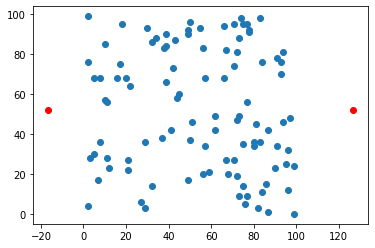

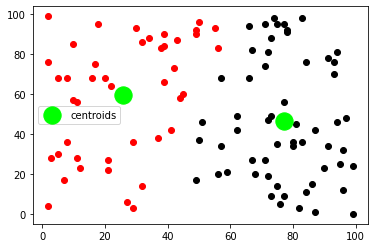

3042.781861170602


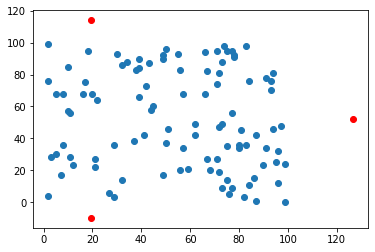

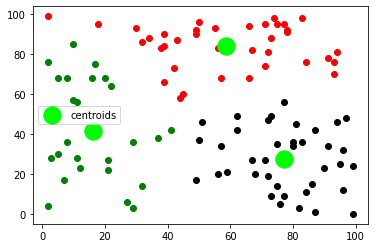

2198.642341309398


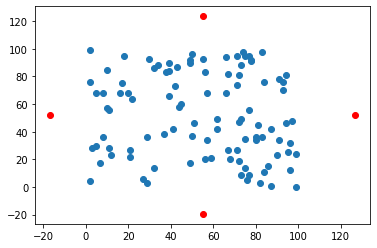

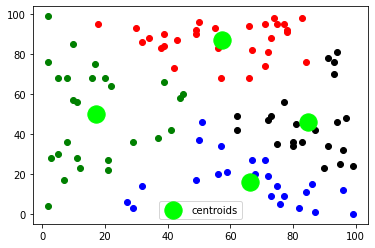

2048.0482256585465
3042.781861170602 2198.642341309398 2048.0482256585465
0.17839955612504993


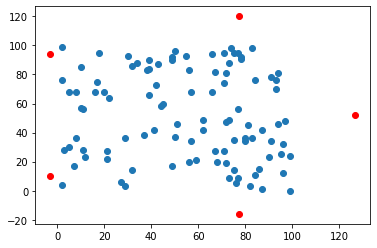

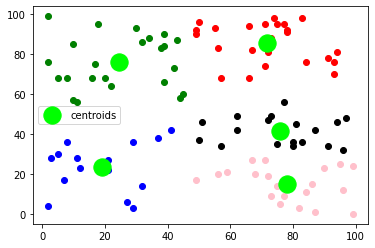

1583.012068848288
3.0880101443567183
k=4


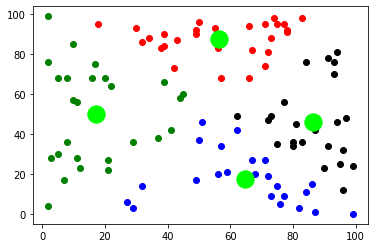

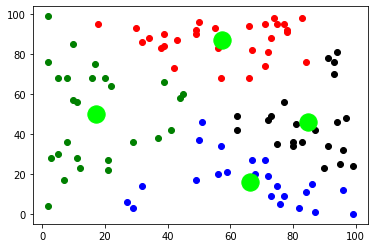

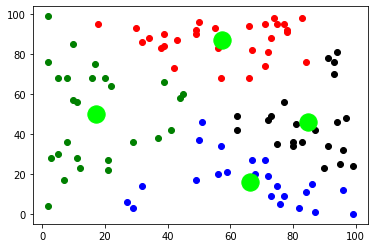

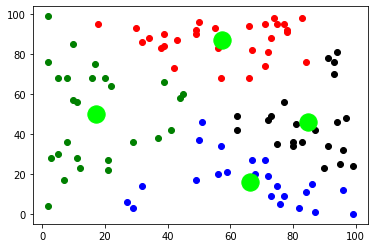

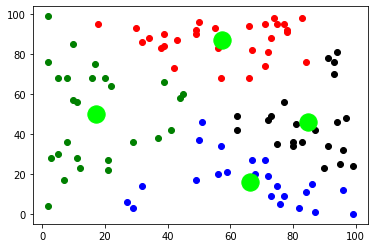

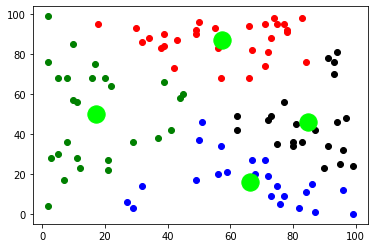

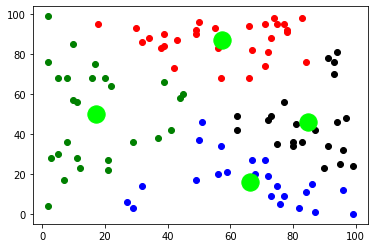

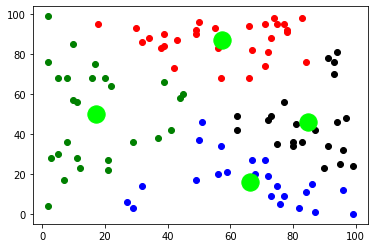

In [15]:
if __name__ == '__main__':
    n=100
    k=3
    points = random_points(n)
    k_prev = kmeans(points, k-1)
    k_curr = kmeans(points, k)
    k_next = kmeans(points, k+1)
    print(k_prev, k_curr, k_next)
    d = np.abs((k_curr - k_next) /(k_prev - k_curr))
    print(d)
    min = False
    while True:
        k_prev = k_curr
        k_curr = k_next
        k =k+1
        k_next = kmeans(points, k+1)
        d_new = np.abs((k_curr - k_next) / (k_prev - k_curr))
        print(d_new)
        if d_new >= d:
          break
    print("k=" + str(k))
    last_algorithm(points, k, True)